In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [9]:
#Loading Dataset
dataset = pd.read_csv (r'D:\Raviteja\personal\Carrier_Global\Coding_Challenge\2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv',encoding = "ISO-8859-1")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.3 KB


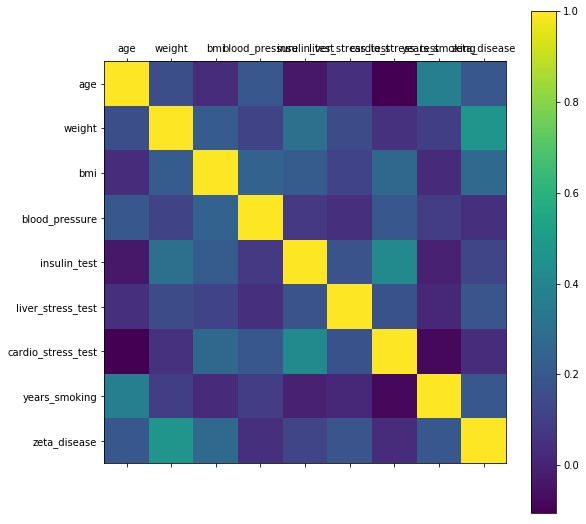

In [10]:
#Understanding the data
#Correlation Matrix
rcParams['figure.figsize'] = 20, 9
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

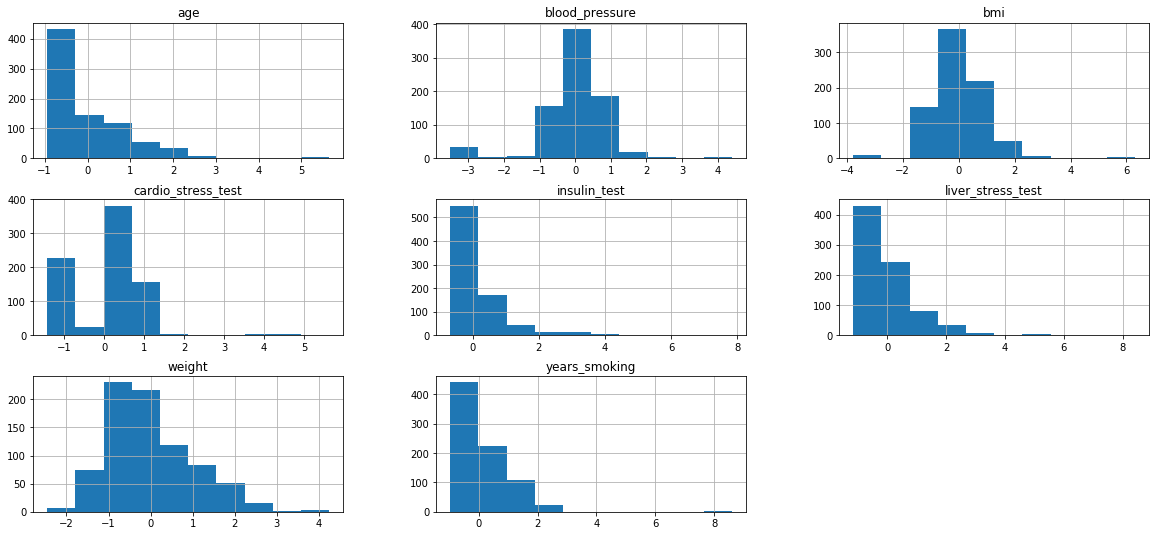

In [11]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

y = dataset[['zeta_disease']]
X = dataset[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]

X.hist()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=66)


In [12]:
y_predict = pd.read_csv (r'D:\Raviteja\personal\Carrier_Global\Coding_Challenge\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv',encoding = "ISO-8859-1")
y_predict = y_predict[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
columns_to_scale = ['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']
y_predict[columns_to_scale] = standardScaler.fit_transform(y_predict[columns_to_scale])

svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, y_train)
y_predicted_SVC = svc_classifier.predict(y_predict)


In [13]:
y_predict = pd.read_csv (r'D:\Raviteja\personal\Carrier_Global\Coding_Challenge\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv',encoding = "ISO-8859-1")
y_predict = y_predict[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
final_data_set = y_predict


final_data_set['zeta_disease'] = y_predicted_SVC
#final_data_set['zeta_disease_KNN_predicted'] = y_predicted_KNN
#final_data_set['zeta_disease_RFC_predicted'] = y_predicted_RFC
#final_data_set['zeta_disease_DTC_predicted'] = y_predicted_DTC
final_data_set.to_csv(r'D:\Raviteja\personal\Carrier_Global\Coding_Challenge\2021-01-21_zeta-disease_predicted-data_dsi-take-home-challenge.csv', index = False)
